<a href="https://colab.research.google.com/github/Yuvaranii/Take-Home/blob/main/Adopted_User.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
import seaborn as sns

In [46]:
import scipy.stats
import matplotlib.dates as mdates
import plotly.graph_objects as go
plt.style.use('bmh')

In [ ]:
with open('takehome_users.csv') as f:
    print(f)
with open('takehome_user_engagement.csv') as f:
    print(f)

In [11]:
Users = pd.read_csv('takehome_users.csv', parse_dates = ['creation_time'], 
                    encoding = "cp1252")
Users_Engagement = pd.read_csv('takehome_user_engagement.csv',  parse_dates = ['time_stamp'], 
                       encoding = "cp1252")

In [12]:
Users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [13]:
Users_Engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [15]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [16]:
Users_Engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [27]:
Users_Engagement.time_stamp=pd.to_datetime(Users_Engagement.time_stamp)
Users_Engagement['date'] = pd.to_datetime(Users_Engagement.time_stamp.dt.date)

In [28]:
Users_Engagement.head(5)

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [32]:
def rolling_count(df_group, frequency):
    return df_group.rolling(frequency, on='date')['user_id'].count()
Users_Engagement['visits_7_days'] = Users_Engagement.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')
Users_Engagement['adopted_user']=(Users_Engagement['visits_7_days']).apply(lambda x: 1 if x>=3 else 0)
Users_Engagement

,time_stamp,user_id,visited,date,visits_7_days,adopted_user
0,2014-04-22 03:53:30,1,1,2014-04-22,1.0,0
1,2013-11-15 03:45:04,2,1,2013-11-15,1.0,0
2,2013-11-29 03:45:04,2,1,2013-11-29,1.0,0
3,2013-12-09 03:45:04,2,1,2013-12-09,1.0,0
4,2013-12-25 03:45:04,2,1,2013-12-25,1.0,0
...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06,1.0,0
207913,2013-01-15 18:28:37,11997,1,2013-01-15,1.0,0
207914,2014-04-27 12:45:16,11998,1,2014-04-27,1.0,0
207915,2012-06-02 11:55:59,11999,1,2012-06-02,1.0,0


In [29]:
Users['last_session_creation_time'] = pd.to_datetime(Users['last_session_creation_time'])

In [31]:
Users.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0


In [34]:
Users.rename(columns={"object_id": "user_id"}, inplace=True)

In [35]:
Users.set_index("user_id", inplace = True)

In [36]:
DF = Users_Engagement.join(Users, on = 'user_id', how='left')
DF

,time_stamp,user_id,visited,date,visits_7_days,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,2014-04-22,1.0,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2013-11-15,1.0,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2013-11-29,1.0,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2013-12-09,1.0,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2013-12-25,1.0,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06,1.0,0,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1970-01-01 00:00:01.378448055,0,0,89,8263.0
207913,2013-01-15 18:28:37,11997,1,2013-01-15,1.0,0,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.358274517,0,0,200,NaN
207914,2014-04-27 12:45:16,11998,1,2014-04-27,1.0,0,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1970-01-01 00:00:01.398602716,1,1,83,8074.0
207915,2012-06-02 11:55:59,11999,1,2012-06-02,1.0,0,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1970-01-01 00:00:01.338638159,0,0,6,NaN


In [39]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   date                        207917 non-null  datetime64[ns]
 4   visits_7_days               207917 non-null  float64       
 5   adopted_user                207917 non-null  int64         
 6   creation_time               207917 non-null  datetime64[ns]
 7   name                        207917 non-null  object        
 8   email                       207917 non-null  object        
 9   creation_source             207917 non-null  object        
 10  last_session_creation_time  207917 non-null  datetime64[ns]
 11  opted_in_to_mailing_list    207917 non-

In [40]:
DF['last_session_creation_time'].fillna(0, inplace = True)
DF['adopted_user'].fillna(0, inplace = True)

In [41]:
DF

,time_stamp,user_id,visited,date,visits_7_days,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,2014-04-22,1.0,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2013-11-15,1.0,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2013-11-29,1.0,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2013-12-09,1.0,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2013-12-25,1.0,0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-09-06,1.0,0,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1970-01-01 00:00:01.378448055,0,0,89,8263.0
207913,2013-01-15 18:28:37,11997,1,2013-01-15,1.0,0,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.358274517,0,0,200,NaN
207914,2014-04-27 12:45:16,11998,1,2014-04-27,1.0,0,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1970-01-01 00:00:01.398602716,1,1,83,8074.0
207915,2012-06-02 11:55:59,11999,1,2012-06-02,1.0,0,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1970-01-01 00:00:01.338638159,0,0,6,NaN


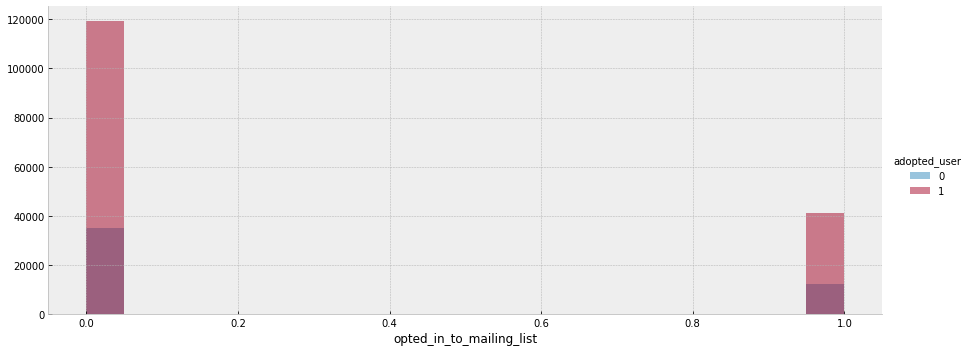

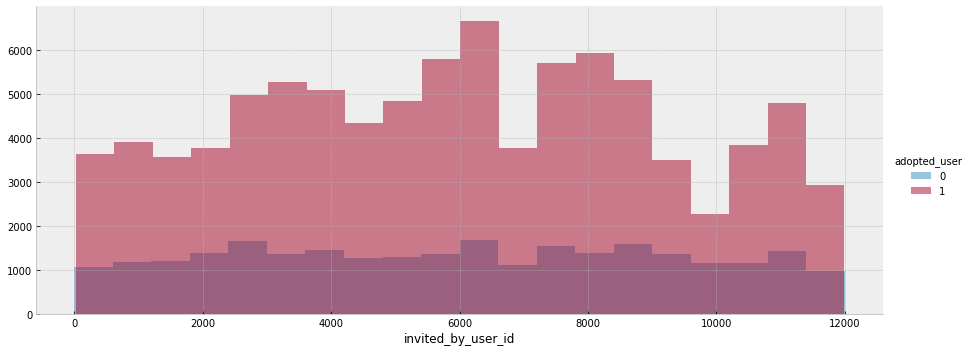

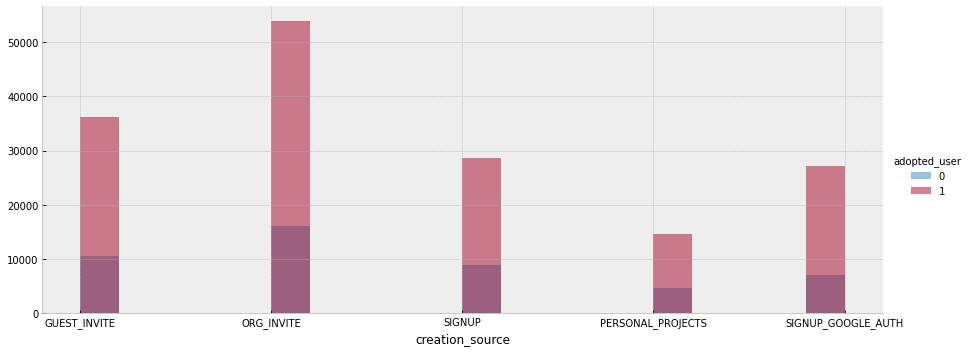

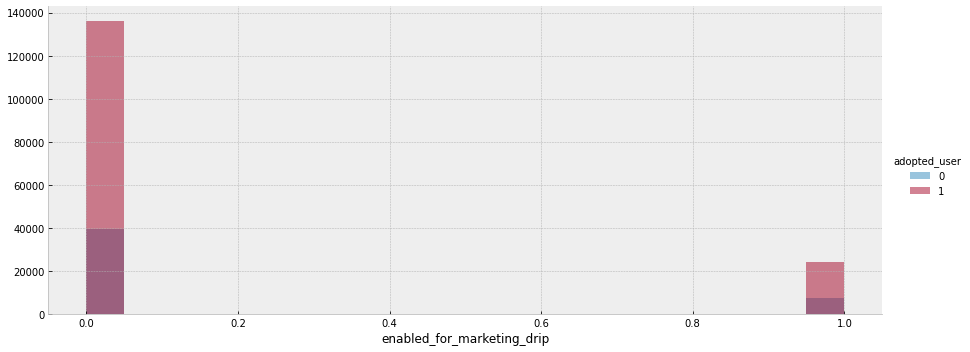

In [52]:
for i in ['opted_in_to_mailing_list', 'invited_by_user_id','creation_source','enabled_for_marketing_drip']:
    g = sns.FacetGrid(DF, hue = "adopted_user", height=5, aspect=2.5)
    g.map(plt.hist, i, alpha=.5, bins = 20)
    g.add_legend()    